In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [51]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


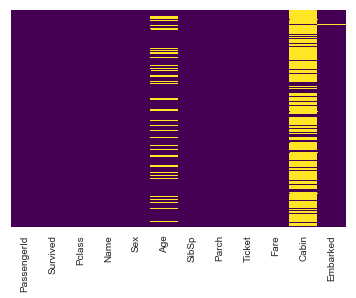

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

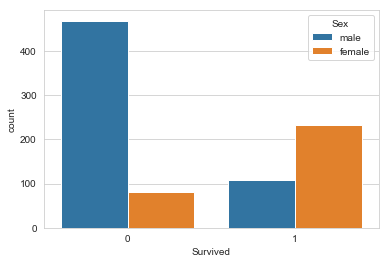

In [14]:
sns.countplot(x='Survived', data=train, hue='Sex')

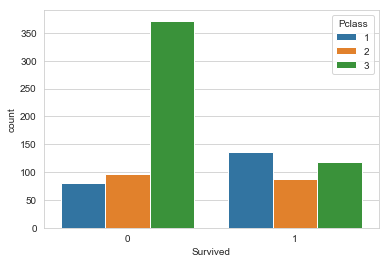

In [15]:
sns.countplot(x='Survived', data=train, hue='Pclass')

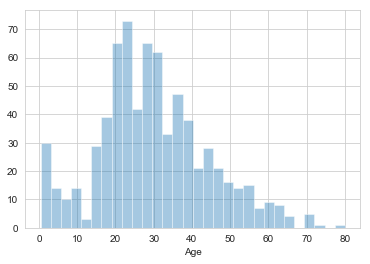

In [19]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

In [20]:
import cufflinks as cf
cf.go_offline()

In [22]:
train['Fare'].iplot(kind='hist',bins=30)

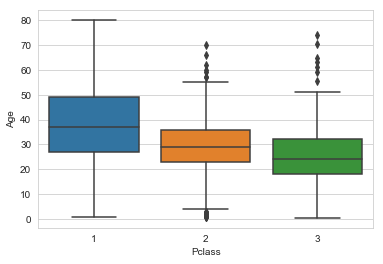

In [23]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [35]:
train.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [36]:
train.groupby('Pclass').mean()['Age'].loc[1]

38.233440860215055

In [45]:
def impute_age(cols): # cols is a 1x2 matrix
# Replacing missing Age values with average Age depending on the PassengerClass
    Age = cols[0] # is just one number, not a vector/matrix
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return train.groupby('Pclass').mean()['Age'].loc[1]
        elif Pclass == 2:
            return train.groupby('Pclass').mean()['Age'].loc[2]
        else:
            return train.groupby('Pclass').mean()['Age'].loc[3]
        
    else:
        return Age


In [52]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [53]:
train.drop('Cabin',axis=1,inplace=True)

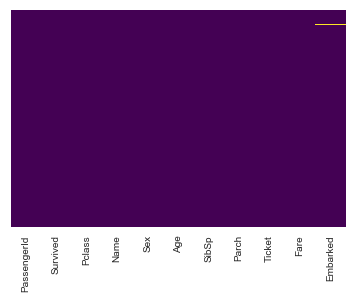

In [57]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
train.dropna(inplace=True)

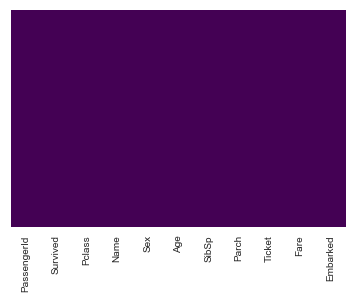

In [59]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [65]:
pd.get_dummies(train['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [64]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
# Keep only one column, to avoid multi-colinearity, beacuse female column can be perfect predictor of male column
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [68]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
# Embark can be C, Q, S - by dropping one of them (C) we can avoid multi-colinearity
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [69]:
train = pd.concat([train,sex,embark], axis=1)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [72]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [73]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [74]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.00000,0,0,13.00,1,0,1
887,888,1,1,19.00000,0,0,30.00,0,0,1
888,889,0,3,25.14062,1,2,23.45,0,0,1
889,890,1,1,26.00000,0,0,30.00,1,0,0
890,891,0,3,32.00000,0,0,7.75,1,1,0


In [76]:
train.drop('PassengerId', axis=1, inplace=True)

In [77]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [78]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
logmodel = LogisticRegression()

In [83]:
logmodel.fit(X_train, y_train)

C:\Users\uranu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
predictions = logmodel.predict(X_test)

In [85]:
from sklearn.metrics import classification_report

In [87]:
print( classification_report(y_test, predictions) ) # Reports the precision, recal, f1-score ect based on Confusion Matrix

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_test, predictions) # Reports the Confusion Matrix ([[tn, fp], [fn, tp]])

array([[148,  15],
       [ 36,  68]], dtype=int64)

Precision or positive predictive value (PPV):  PPV = TP/(TP + FP) = 1 - FDR

Recall, sensitivity, hit rate, or true positive rate (TPR): TPR = TP/P = TP/(TP+FN) = 1 - FNR

Accuracy (ACC) = (TP+TN)/(P+N) = (TP+TN)/(TP+TN+FP+FN)

F1 score is the harmonic mean of precision and sensitivity: F1 = 2 * (PPV.TPR)/(PPV+TPR)

In [ ]:
confusion_matrix()

In [94]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [95]:
tn, fp, fn, tp

(148, 15, 36, 68)